### Trackpy Package Tutorial (Trial)

In [1]:
import os

import matplotlib.pyplot as plt
from trackpy_package import Trial

Load folder with frames. Do not rename folder name or frame file names. Folder should be in same directory as notebook

In [2]:
cwd = os.getcwd() # Get path to directory that this notebook is being run in
frames_path = os.path.join(cwd, '2um_1') # Create path to folder containing frames
dat = Trial(frames_dir_path=frames_path, microns_per_pixel=0.197)

Use `.locate()` function to find optimal `diameter` and `minmass` values. Will locate particles on frame `frame_num` using these parameters

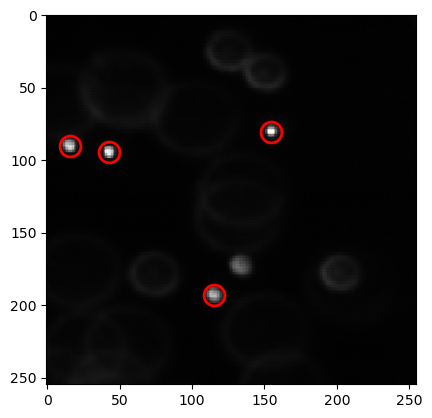

In [3]:
dat.locate(frame_num=3, diameter=13, minmass=2900) # Adjust values to see effects

Call `.batch()` (locates particle in each frame) using calculated parameters, then `.link()` (links frames to calculate trajectory) on Sample object. Refer to code/trackpy docs to see other parameters, but the ones used below seem to be most relevant. Search range specifies how far a particle can travel between frames to still be considered the same particle.

In [4]:
dat.batch(diameter=13, minmass=2900)

Frame 37: 4 features


In [5]:
dat.link(search_range=10)

Frame 37: 4 trajectories present.


Trajectory data will now be stored in `.link_df`

Use `.plot_traj()` to plot calculated trajectories. `plot_traj_single(particle_num)` plots single particle trajectory

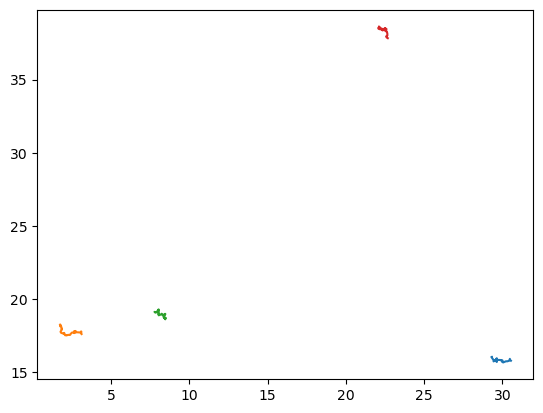

In [6]:
dat.plot_traj()

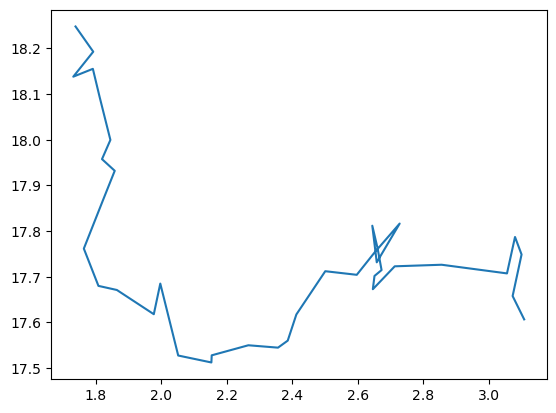

In [7]:
dat.plot_traj_single(1)

`.get_particle(particle_num)` will return a DataFrame with data only for `particle=particle_num`. Useful if you want to perform calculations yourself. Otherwise, skip

In [8]:
dat.get_particle(particle_num=1).head()

,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle,time (s)
1,17.606555,3.107503,4226.866623,2.763842,0.073757,126.944845,11359.0,0.002855,0,1,0.000
5,17.657681,3.072265,4304.209095,2.792382,0.086484,130.410620,11322.0,0.002834,1,1,0.164
11,17.748689,3.099527,4335.172108,2.750493,0.076574,130.885656,11472.0,0.002685,2,1,0.328
14,17.786995,3.079545,4372.993887,2.783299,0.064596,132.654961,11592.0,0.002526,3,1,0.491
19,17.707234,3.055054,4265.754094,2.821527,0.082588,124.725793,11389.0,0.002817,4,1,0.655


Calculate dsquared for single particle `particle_num`

In [9]:
dat.get_dsquared_single(particle_num=1).head()

,delta x,delta y,delta time (s),dsquared
5,-0.035238,0.051126,0.164,0.003856
11,0.027262,0.091007,0.164,0.009026
14,-0.019982,0.038306,0.163,0.001867
19,-0.024490,-0.079761,0.164,0.006962
21,-0.199393,0.018986,0.164,0.040118


Plot squared displacement for single particle `particle_num`

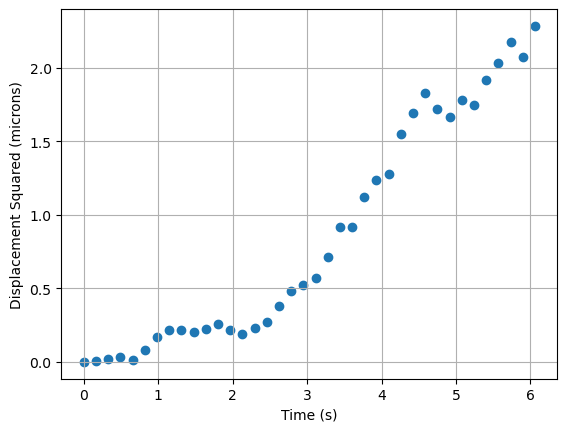

In [10]:
dat.plot_squared_disp_single(particle_num=1)
plt.grid()

Plot squared displacement for ALL particles

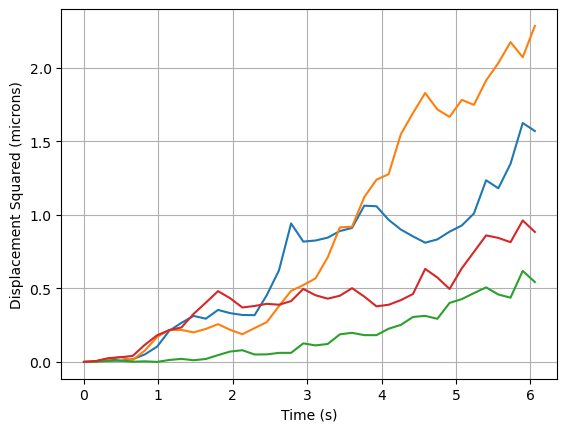

In [11]:
dat.plot_squared_disp()
plt.grid()

Get diffusion coefficient for single particle. Units are in $m^2/s$. First is value, second is error.

In [12]:
a = dat.get_diffusion_coefficient_single(0)
print(a)

(1.1670567112952436e-14, 1.9965859565653263e-15)


Plot all measured diffusion coefficients (one for each particle tracked) with errorbars.

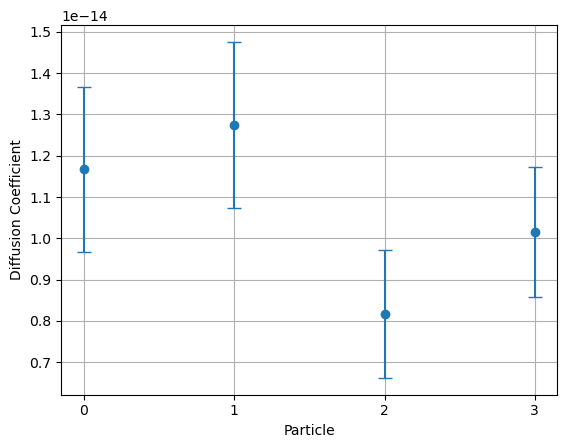

In [13]:
dat.plot_diffusion_coefficients()
plt.grid()